In [ ]:
# Import necessary libraries
!apt-get install ffmpeg -y
!pip install ffmpeg-python matplotlib Pillow opencv-python moviepy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# Install FFmpeg
!apt-get update
!apt-get install -y ffmpeg

# Install ffmpeg-python
!pip install ffmpeg-python


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:14 https

In [ ]:
# Install ffmpeg and ffmpeg-python
!apt-get install ffmpeg
!pip install ffmpeg-python
!pip install opencv-python
!pip install matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.


In [ ]:
# Remove existing installation of ffmpeg
!apt-get remove ffmpeg -y

# Download and install the latest version of ffmpeg
!add-apt-repository ppa:savoury1/ffmpeg4 -y
!apt-get update
!apt-get install ffmpeg -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  ffmpeg
0 upgraded, 0 newly installed, 1 to remove and 48 not upgraded.
After this operation, 2,288 kB disk space will be freed.
(Reading database ... 123598 files and directories currently installed.)
Removing ffmpeg (7:4.4.2-0ubuntu0.22.04.1) ...
Processing triggers for man-db (2.10.2-1) ...
Repository: 'deb https://ppa.launchpadcontent.net/savoury1/ffmpeg4/ubuntu/ jammy main'
Description:
FFmpeg 4.4.5 builds (& associated multimedia packages) for Xenial & newer.

*** Anyone interested in full builds of FFmpeg 4.4.x including all "bells and whistles" needs to have donated, after which access to the new private PPA can be requested. See my Launchpad page linked below for details. ***

*** Please always see https://launchpad.net/~savoury1 for general updates about this Launchpad site before contacting me or reporting any bugs! ***

*** Big thanks to 

In [ ]:
!pip install ffmpeg-python

In [ ]:
import ffmpeg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
from moviepy.editor import ImageSequenceClip
import os
from google.colab import files
import io

In [ ]:
import ffmpeg

# Path to your video file
video_file = '/content/Produce.mp4'

# Extract all frames from the video
!ffmpeg -i {video_file} image%2d.png

# Verification step to list the extracted frames
import glob
frames = glob.glob('image*.png')
print(f'Extracted {len(frames)} frames from {video_file}')


ffmpeg version 4.4.5-0ubuntu1~22.04.sav0 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.4.0-1ubuntu1~22.04)
  configuration: --prefix=/usr --extra-version='0ubuntu1~22.04.sav0' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-li

In [ ]:
# Ensure ffmpeg-python and matplotlib libraries are installed
!pip install ffmpeg-python
!pip install matplotlib


Frame counts: {'I': 1, 'P': 10, 'B': 19}
Percentages: {'I': 3.3333333333333335, 'P': 33.33333333333333, 'B': 63.33333333333333}


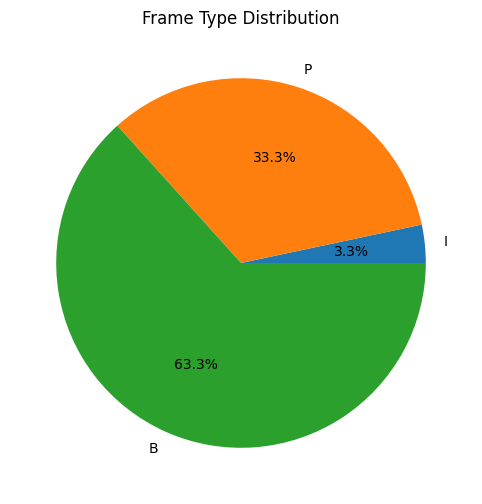

In [ ]:
import subprocess
import json
import matplotlib.pyplot as plt

# Function to get frame types using ffprobe
def get_frame_types(video_file):
    try:
        # Use ffprobe to extract frame information
        result = subprocess.run(
            [
                'ffprobe',
                '-v', 'error',
                '-select_streams', 'v:0',
                '-show_entries', 'frame=pict_type',
                '-of', 'json',
                video_file
            ],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        frames = json.loads(result.stdout)['frames']

        # Count frame types
        frame_count = {'I': 0, 'P': 0, 'B': 0}
        for frame in frames:
            pict_type = frame['pict_type']
            frame_count[pict_type] += 1

        return frame_count
    except subprocess.CalledProcessError as e:
        print("Error occurred while running ffprobe:", e.stderr)
        return None

# Analyze frame types
video_file = '/content/Produce.mp4'  # Ensure this path is correct
frame_count = get_frame_types(video_file)

if frame_count:
    # Calculate percentages
    total_frames = sum(frame_count.values())
    percentages = {ftype: (count / total_frames) * 100 for ftype, count in frame_count.items()}

    # Print frame counts and percentages
    print(f"Frame counts: {frame_count}")
    print(f"Percentages: {percentages}")

    # Plot frame distribution
    plt.figure(figsize=(8, 6))
    plt.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%')
    plt.title('Frame Type Distribution')
    plt.show()
else:
    print("Failed to analyze frame types.")


FFprobe Output:
 {
    "frames": [
        {
            "pkt_size": "185951"
        },
        {
            "pkt_size": "16524"
        },
        {
            "pkt_size": "20691"
        },
        {
            "pkt_size": "56852"
        },
        {
            "pkt_size": "20110"
        },
        {
            "pkt_size": "19945"
        },
        {
            "pkt_size": "99962"
        },
        {
            "pkt_size": "33936"
        },
        {
            "pkt_size": "36179"
        },
        {
            "pkt_size": "96573"
        },
        {
            "pkt_size": "37925"
        },
        {
            "pkt_size": "33081"
        },
        {
            "pkt_size": "109707"
        },
        {
            "pkt_size": "42857"
        },
        {
            "pkt_size": "45040"
        },
        {
            "pkt_size": "104382"
        },
        {
            "pkt_size": "41586"
        },
        {
            "pkt_size": "38143"
        },
        

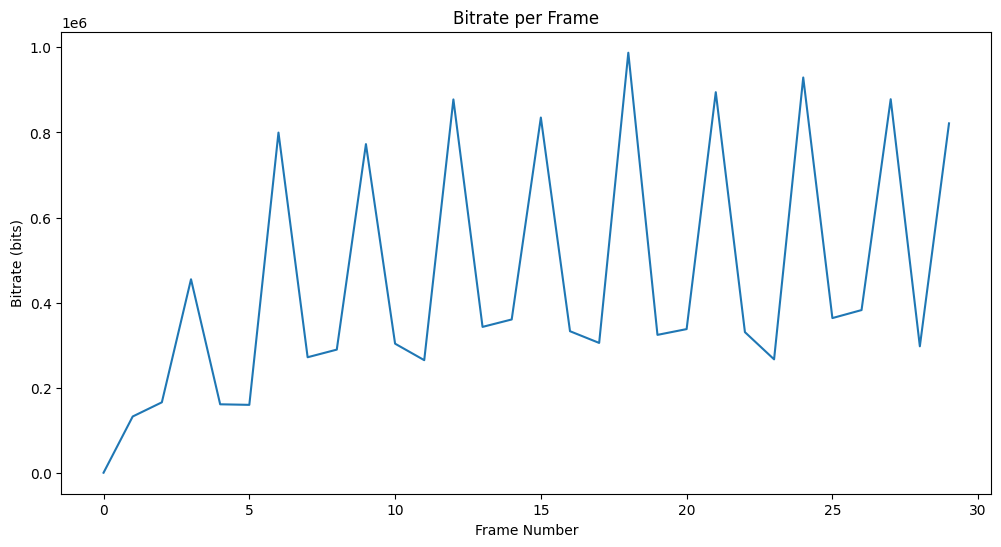

In [ ]:
import subprocess
import json
import matplotlib.pyplot as plt

# Function to get bitrate information using ffprobe
def get_bitrate_info(video_file):
    try:
        # Use ffprobe to extract frame information
        result = subprocess.run(
            [
                'ffprobe',
                '-v', 'error',
                '-select_streams', 'v:0',
                '-show_entries', 'frame=pkt_size',
                '-of', 'json',
                video_file
            ],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        # Print the entire JSON output for debugging
        print("FFprobe Output:\n", result.stdout)

        frames = json.loads(result.stdout).get('frames', [])

        if not frames:
            print("No frames found in the video file.")
            return None

        # Calculate bitrate for each frame
        bitrates = []
        for i, frame in enumerate(frames):
            if i == 0:
                bitrates.append(0)
            else:
                bitrates.append(int(frame['pkt_size']) * 8)  # Convert size from bytes to bits

        return bitrates
    except subprocess.CalledProcessError as e:
        print("Error occurred while running ffprobe:", e.stderr)
        return None

# Analyze bitrate information
video_file = '/content/Produce.mp4'  # Ensure this path is correct
bitrates = get_bitrate_info(video_file)

if bitrates:
    # Plot bitrate information
    plt.figure(figsize=(12, 6))
    plt.plot(bitrates)
    plt.xlabel('Frame Number')
    plt.ylabel('Bitrate (bits)')
    plt.title('Bitrate per Frame')
    plt.show()
else:
    print("Failed to analyze bitrate information.")


In [ ]:
# Specify the path to the video file
video_path = '/content/Produce.mp4'


In [ ]:
import os

# Create directories for each frame type
os.makedirs('I_frames', exist_ok=True)
os.makedirs('P_frames', exist_ok=True)
os.makedirs('B_frames', exist_ok=True)

# Extract I-frames
!ffmpeg -i {video_path} -vf "select='eq(pict_type\,I)'" -vsync vfr I_frames/I_frame_%03d.png

# Extract P-frames
!ffmpeg -i {video_path} -vf "select='eq(pict_type\,P)'" -vsync vfr P_frames/P_frame_%03d.png

# Extract B-frames
!ffmpeg -i {video_path} -vf "select='eq(pict_type\,B)'" -vsync vfr B_frames/B_frame_%03d.png


ffmpeg version 4.4.5-0ubuntu1~22.04.sav0 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.4.0-1ubuntu1~22.04)
  configuration: --prefix=/usr --extra-version='0ubuntu1~22.04.sav0' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-li

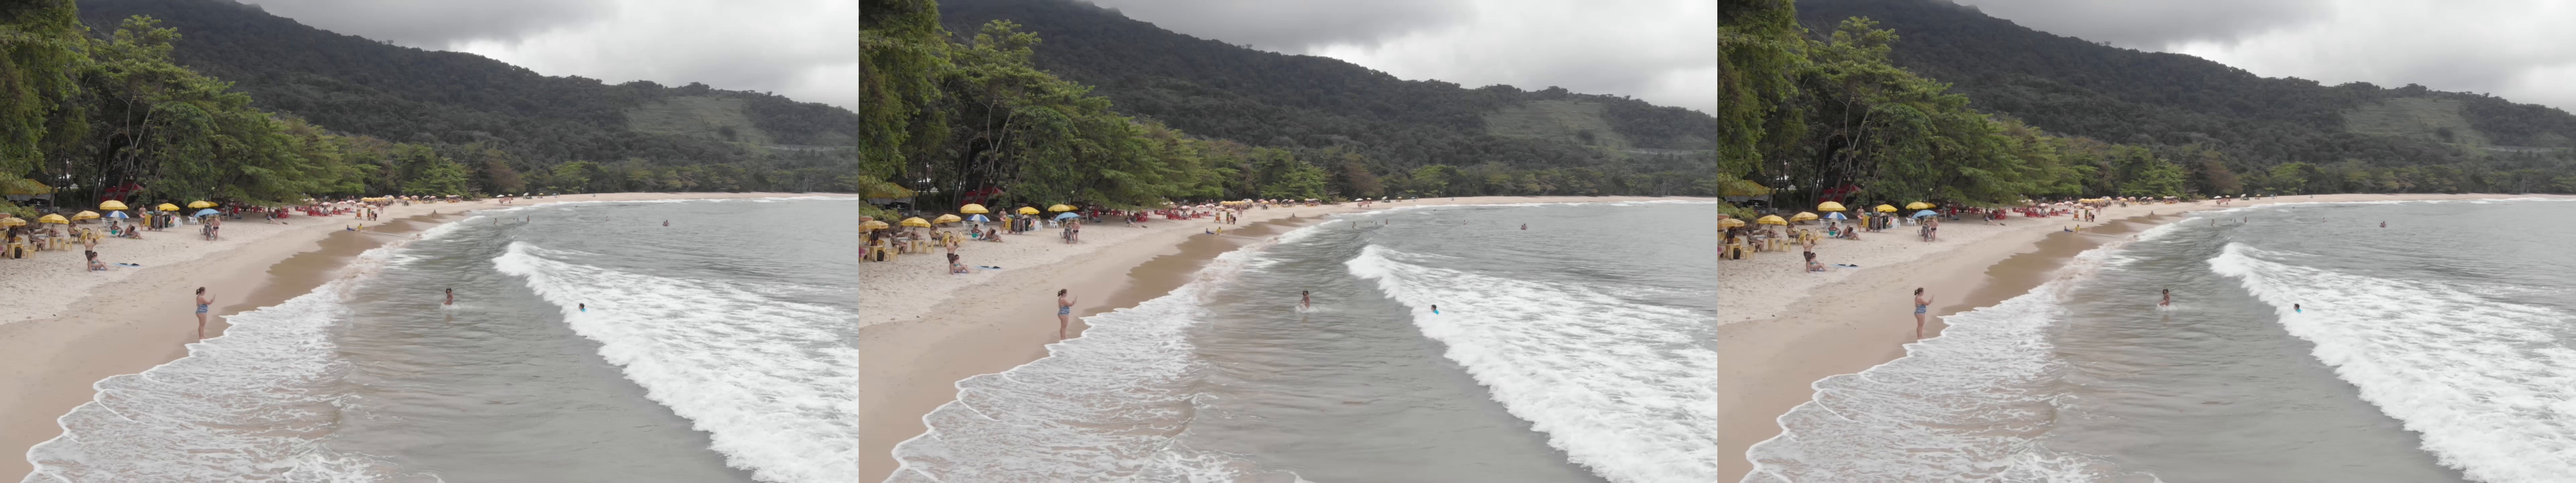

In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Paths to the first extracted frames
i_frame_path = 'I_frames/I_frame_001.png'
p_frame_path = 'P_frames/P_frame_001.png'
b_frame_path = 'B_frames/B_frame_001.png'

# Load the frames
i_frame = cv2.imread(i_frame_path)
p_frame = cv2.imread(p_frame_path)
b_frame = cv2.imread(b_frame_path)

# Check if frames are loaded properly
if i_frame is None:
    print(f"Error loading frame from {i_frame_path}")
if p_frame is None:
    print(f"Error loading frame from {p_frame_path}")
if b_frame is None:
    print(f"Error loading frame from {b_frame_path}")

# Resize frames to the same height (optional, for consistent display)
# This is only needed if the frames are of different sizes
height = min(i_frame.shape[0], p_frame.shape[0], b_frame.shape[0])
i_frame = cv2.resize(i_frame, (int(i_frame.shape[1] * height / i_frame.shape[0]), height))
p_frame = cv2.resize(p_frame, (int(p_frame.shape[1] * height / p_frame.shape[0]), height))
b_frame = cv2.resize(b_frame, (int(b_frame.shape[1] * height / b_frame.shape[0]), height))

# Concatenate frames horizontally
concatenated_frames = np.concatenate((i_frame, p_frame, b_frame), axis=1)

# Display the concatenated frames
cv2_imshow(concatenated_frames)


In [31]:
import cv2
import numpy as np

def calculate_psnr(img1, img2):
    # Ensure the images are in the same shape and type
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE is zero means no noise is present in the signal.
        return float('inf')
    PIXEL_MAX = 255.0
    psnr = 20 * np.log10(PIXEL_MAX / np.sqrt(mse))
    return psnr


In [32]:
# Paths to the first extracted frames
i_frame_path = 'I_frames/I_frame_001.png'
p_frame_path = 'P_frames/P_frame_001.png'
b_frame_path = 'B_frames/B_frame_001.png'

# Load the frames
i_frame = cv2.imread(i_frame_path)
p_frame = cv2.imread(p_frame_path)
b_frame = cv2.imread(b_frame_path)

# Check if frames are loaded properly
if i_frame is None:
    print(f"Error loading frame from {i_frame_path}")
if p_frame is None:
    print(f"Error loading frame from {p_frame_path}")
if b_frame is None:
    print(f"Error loading frame from {b_frame_path}")


In [33]:
# PSNR between I-frame and P-frame
psnr_ip = calculate_psnr(i_frame, p_frame)
print(f"PSNR between I-frame and P-frame: {psnr_ip} dB")

# PSNR between I-frame and B-frame
psnr_ib = calculate_psnr(i_frame, b_frame)
print(f"PSNR between I-frame and B-frame: {psnr_ib} dB")


PSNR between I-frame and P-frame: 30.65501650439912 dB
PSNR between I-frame and B-frame: 32.37271174917757 dB


In [35]:
import os

def calculate_average_frame_size(directory):
    total_size = 0
    num_files = 0

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            total_size += os.path.getsize(filepath)
            num_files += 1

    if num_files == 0:
        return 0
    return total_size / num_files

# Calculate average file sizes in bytes
average_i_frame_size = calculate_average_frame_size('I_frames')
average_p_frame_size = calculate_average_frame_size('P_frames')
average_b_frame_size = calculate_average_frame_size('B_frames')

# Convert to kilobytes (KB)
average_i_frame_size_kb = average_i_frame_size / 1024
average_p_frame_size_kb = average_p_frame_size / 1024
average_b_frame_size_kb = average_b_frame_size / 1024

print(f"Average I-frame size: {average_i_frame_size_kb:.2f} KB")
print(f"Average P-frame size: {average_p_frame_size_kb:.2f} KB")
print(f"Average B-frame size: {average_b_frame_size_kb:.2f} KB")


Average I-frame size: 998.77 KB
Average P-frame size: 1087.40 KB
Average B-frame size: 1081.92 KB


In [36]:
import os
import subprocess

# Create a directory to save I-frames
i_frame_dir = "I_frames_reconstructed"
os.makedirs(i_frame_dir, exist_ok=True)

# Extract I-frames using ffmpeg
input_video = "path_to_your_video.mp4"
subprocess.run([
    "ffmpeg", "-i", input_video, "-vf", "select='eq(pict_type\\,I)'", "-vsync", "vfr",
    f"{i_frame_dir}/I_frame_%03d.png"
])

print(f"I-frames have been saved to the directory: {i_frame_dir}")


I-frames have been saved to the directory: I_frames_reconstructed


In [37]:
# Define the path for the output reconstructed video
output_video = "reconstructed_video.mp4"

# Reconstruct video using the extracted I-frames
subprocess.run([
    "ffmpeg", "-framerate", "1", "-i", f"{i_frame_dir}/I_frame_%03d.png", "-c:v", "libx264",
    "-pix_fmt", "yuv420p", "-r", "30", output_video
])

print(f"The reconstructed video has been saved as: {output_video}")


The reconstructed video has been saved as: reconstructed_video.mp4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
